# Bitbot

## Setup

### Load config files

In [33]:
import os
import pathlib
from src.configuration.bitbot_files import use_config_dir
from src.configuration.bitbot_config import load_config_ini

curdir = pathlib.Path(os.path.abspath('')).resolve()

files = use_config_dir(curdir)
config = load_config_ini(files)
config.set('display', 'output', 'disk')
config.set('display', 'resolution', '400x300')

files.base_style


'/workspaces/Bitbot/config/mpl_styles/base.mplstyle'

## MPF plot

### Fetch Data

In [1165]:
# fetch candles
import datetime
import ccxt
exchange = getattr(ccxt, 'coinbase')()
mkts = exchange.loadMarkets()

chart_start = (datetime.datetime.now() - datetime.timedelta(days=30)).timestamp() * 1000
exchange_data = exchange.fetchOHLCV('BTC/USD', '1d', limit=20, since=chart_start)
# convert candles to dataframe
import pandas as pd
df = pd.DataFrame(exchange_data)
#df = df.drop([6, 7], axis=1, errors='ignore')
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
df["date"] = df.date.map(lambda s: datetime.datetime.utcfromtimestamp(s // 1000))
df.set_index(df["date"], inplace=True)
df.index = pd.DatetimeIndex(df['date'], dtype='datetime64[ms]')
                  
#df['date'] = pd.to_datetime(df['date'], unit='ms', utc=True)
# df['index'] = pd.to_datetime(df['date'], unit='ms', utc=True)
# df.index = pd.DatetimeIndex(df['index'])
# df.set_index('index', inplace=True)
df

,date,open,high,low,close,volume
date,,,,,,
2024-12-06,2024-12-06,97049.47,102104.12,96424.20,99891.35,17801.212940
2024-12-07,2024-12-07,99885.37,100583.27,99012.73,99929.32,4774.350878
2024-12-08,2024-12-08,99919.20,101435.05,98729.66,101174.99,4230.352252
2024-12-09,2024-12-09,101175.00,101290.73,94220.80,97324.81,20103.050735
2024-12-10,2024-12-10,97330.66,98338.17,94273.38,96660.76,20620.538775
2024-12-11,2024-12-11,96660.75,101984.98,95722.79,101202.11,21190.237533
2024-12-12,2024-12-12,101211.61,102595.00,99298.39,100030.47,14796.924565
2024-12-13,2024-12-13,100024.75,101959.13,99220.81,101428.75,13327.599541
2024-12-14,2024-12-14,101428.74,102650.00,100600.00,101399.99,4181.401803


## Try to draw an attractive graph

### ⏲️ select datetime format

In [1166]:
# import numpy 

# candle_time_delta = df.index.values[1] - df.index.values[0]
# if(candle_time_delta <= numpy.timedelta64(1,'h')):
#     format = '%H:%M'
# elif(candle_time_delta <= numpy.timedelta64(1,'D')): 
#     format = '%b.%d'
# else:
#     format = '%b'

### 📐 mpf style

In [1167]:
import matplotlib.font_manager as font_manager

fonts = font_manager.findSystemFonts(fontpaths=files.resource_folder)
for font_file in fonts:
    font_manager.fontManager.addfont(font_file)

nice_style = {
    "base_mpl_style": "dark_background",
    "marketcolors": {
        "candle": {"up": "green", "down": "red"},  
        "edge": {"up": "green", "down": "red"},  
        "wick": {"up": "green", "down": "red"},  
        "ohlc": {"up": "green", "down": "red"},
        "volume": {"up": "green", "down": "red"},  
        "vcedge": {"up": "green", "down": "red"},  
        "vcdopcod": False,
        "alpha": 1,
    },
    "mavcolors": ("#ad7739", "#a63ab2", "#62b8ba"),
    "facecolor": "black",
    "gridcolor": "None",
    "gridstyle": "--",
    "y_on_right": False,
    "rc": {
        "axes.grid": True,
        "axes.grid.axis": "y",
        "axes.edgecolor": "#474d56",
        "axes.titlecolor": "red",
        "figure.facecolor": "#161a1e",
        "figure.titlesize": "x-large",
        "figure.titleweight": "semibold",
        "font.family": "sans-serif",
        "font.sans-serif": "basis33",
        "savefig.pad_inches": "0",
        "savefig.transparent": True,
        "xtick.labelsize":   "11",
        "ytick.labelsize":    "11",
        "axes.spines.top":    "False",
        "axes.spines.right":  "False",
        "axes.spines.bottom":    "True",
        "axes.spines.left":  "True",
        "text.hinting_factor":"1",
        "text.hinting":       "native",
        "text.antialiased":   "False",
        "patch.antialiased":  "False",
        "lines.antialiased":  "False",
    },
}

### 📈 create plot figure

In [1187]:
display_size = (600,448)
display_dpi = 130

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
from matplotlib.ticker import EngFormatter

class foo():
    def __init__(self, display_size, display_dpi):
        self.min_candle_width = 3;
                



fig, ax = mpf.plot(
    df,
    scale_width_adjustment=dict(volume=0.9, candle=0.8, lines=0.05), # sharpen candle lines
    update_width_config=dict(candle_linewidth=0.6), # sharpen candles, also removes curves :  "thickness of candle edge and its wick"
    returnfig=True,
    type='candle',
    volume=False,
    style=nice_style,
    tight_layout=True,
    figsize=tuple(dim/display_dpi for dim in display_size),
    xrotation=0,
)

matplotlib.use('Agg')
for a in ax: 
    a.set_ylabel("")
    a.set_xlabel("")
    #a.margins(0.05, 0.05)
    #a.locator_params(axis='both', tight=True)
    a.yaxis.set_major_formatter(EngFormatter(sep=''))
    #a.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.DayLocator(interval=1)))
    #a.xaxis.set_major_formatter(mdates.DateFormatter())
    #a.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    #a.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
    a.xaxis.set_minor_locator(mdates.DayLocator())
    a.autoscale(enable=True, axis="x", tight=False)
    a.autoscale(enable=True, axis="y", tight=False)

## Output

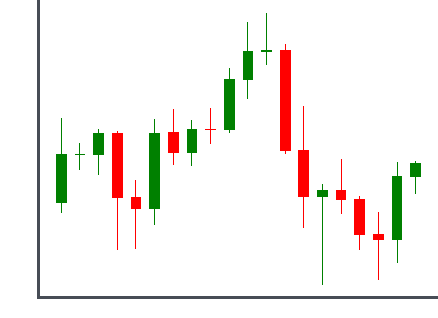

In [1188]:
import io
from PIL import Image
with io.BytesIO() as file_stream:
    fig.savefig(file_stream, bbox_inches='tight')
    chart_image = Image.open(file_stream)
    chart_image.show()